# **Imports**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("/content/Num_Unemployed - Num_Unemployed.csv")

# Plotting the data

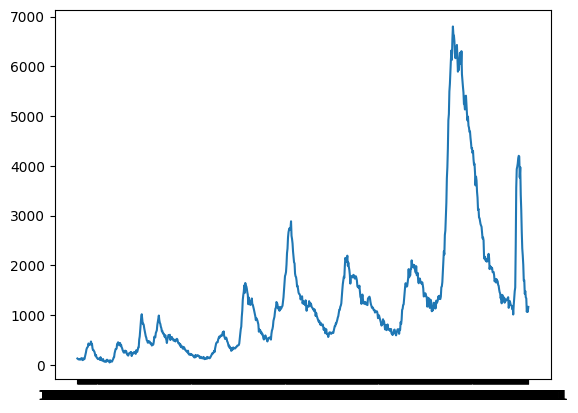

In [ ]:
plt.plot(data["DATE"],data["Value"])
plt.show()

# At this stage, We will not use the last 12 records of the series

In [ ]:
train_value = data["Value"][:-12]
train_date = data["DATE"][:-12]

# Running ADF test on data to check if the data is stationary

In [ ]:
result=adfuller(train_value.dropna())
print("ADF Statistic: ", result[0])
print("p-value: ",result[1])
for key,value in result[4].items():
  print(str(key)+" : "+str(value))

ADF Statistic:  -2.828444076709055
p-value:  0.05432419819703687
1% : -3.437923659686726
5% : -2.8648832361839442
10% : -2.5685501889710864


# Differentiating the data once to check if it has become stationary, since it is not

In [ ]:
result=adfuller(train_value.diff().dropna())
print("ADF Statistic: ", result[0])
print("p-value: ",result[1])
for key,value in result[4].items():
  print(str(key)+" : "+str(value))

ADF Statistic:  -5.542481149998086
p-value:  1.689423212666125e-06
1% : -3.437923659686726
5% : -2.8648832361839442
10% : -2.5685501889710864


# Plotting the differentiated stationary data

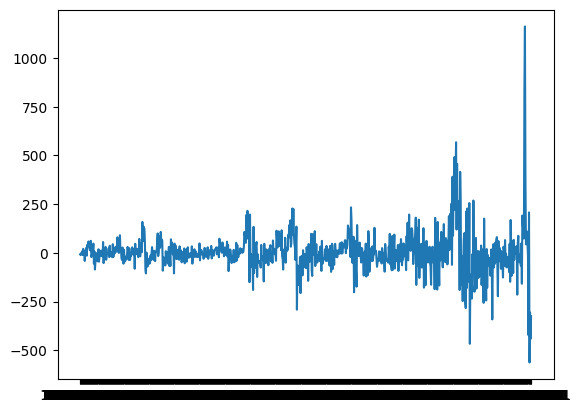

In [ ]:
plt.plot(train_date,train_value.diff())
plt.show()

# Organize data

In [ ]:
new_data = data["Value"].diff()
train_value = new_data[1:-12]
test_value = new_data[-12:]

# Plotting ACF and PACF to find ARIMA parameters

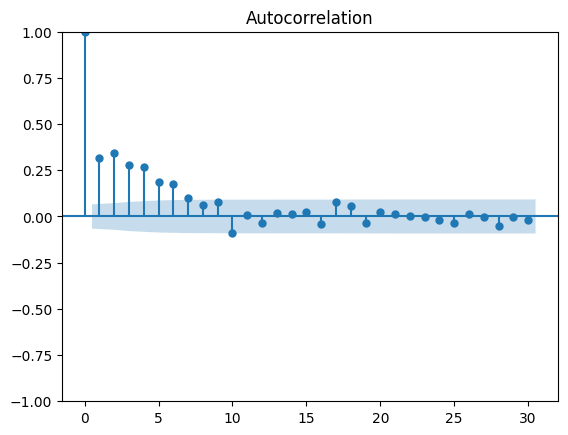

In [ ]:
acf_plot=plot_acf(train_value)

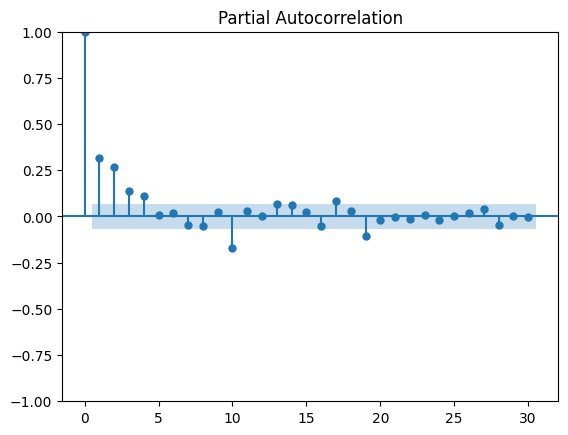

In [ ]:
pacf_plot=plot_pacf(train_value)

# Running model with chosen parameters

In [ ]:
train_data = data[:-12]
model416=ARIMA(train_data["Value"],order=(4,1,6))
model_fit416=model416.fit()
model_fit416.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                  886
Model:                 ARIMA(4, 1, 6)   Log Likelihood               -5265.227
Date:                Sat, 27 Jan 2024   AIC                          10552.454
Time:                        22:22:59   BIC                          10605.096
Sample:                             0   HQIC                         10572.580
                                - 886                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2930      0.106      2.752      0.006       0.084       0.502
ar.L2          0.4828      0.081      5.943      0.000       0.324       0.642
ar.L3          0.4435      0.053      8.329      0.000       0.339       0.548
ar.L4         -0.6042      0.078     -7.764      0.000      -0.757      -0.452
ma.L1         -0.1203      0.103     -1.168      0.243      -0.322       0.082
ma.L2         -0.3040      0.090     -3.367      0.001      -0.481      -0.127
ma.L3         -0.4022      0.038    -10.554      0.000      -0.477      -0.328
ma.L4          0.6174      0.051     12.000      0.000       0.517       0.718
ma.L5         -0.0145      0.034     -0.433      0.665      -0.080       0.051
ma.L6          0.1282      0.034      3.794      0.000       0.062       0.194
sigma2      8917.9877    179.024     49.815      0.000    8567.107    9268.868
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             15631.57
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              15.96   Skew:                             1.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Check if it's statistically significant model

In [ ]:
for p in range(1,5):
    for q in range(1,7):
        if not any(ARIMA(train_data["Value"], order=(p,1,q)).fit().pvalues>0.05):
            print(f'p={p}, q={q}')

p=1, q=1
p=1, q=2
p=1, q=3
p=2, q=1
p=2, q=2
p=2, q=3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p=3, q=6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conver

# Evaluate the performance of these models using RMSE metric over the test_set

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


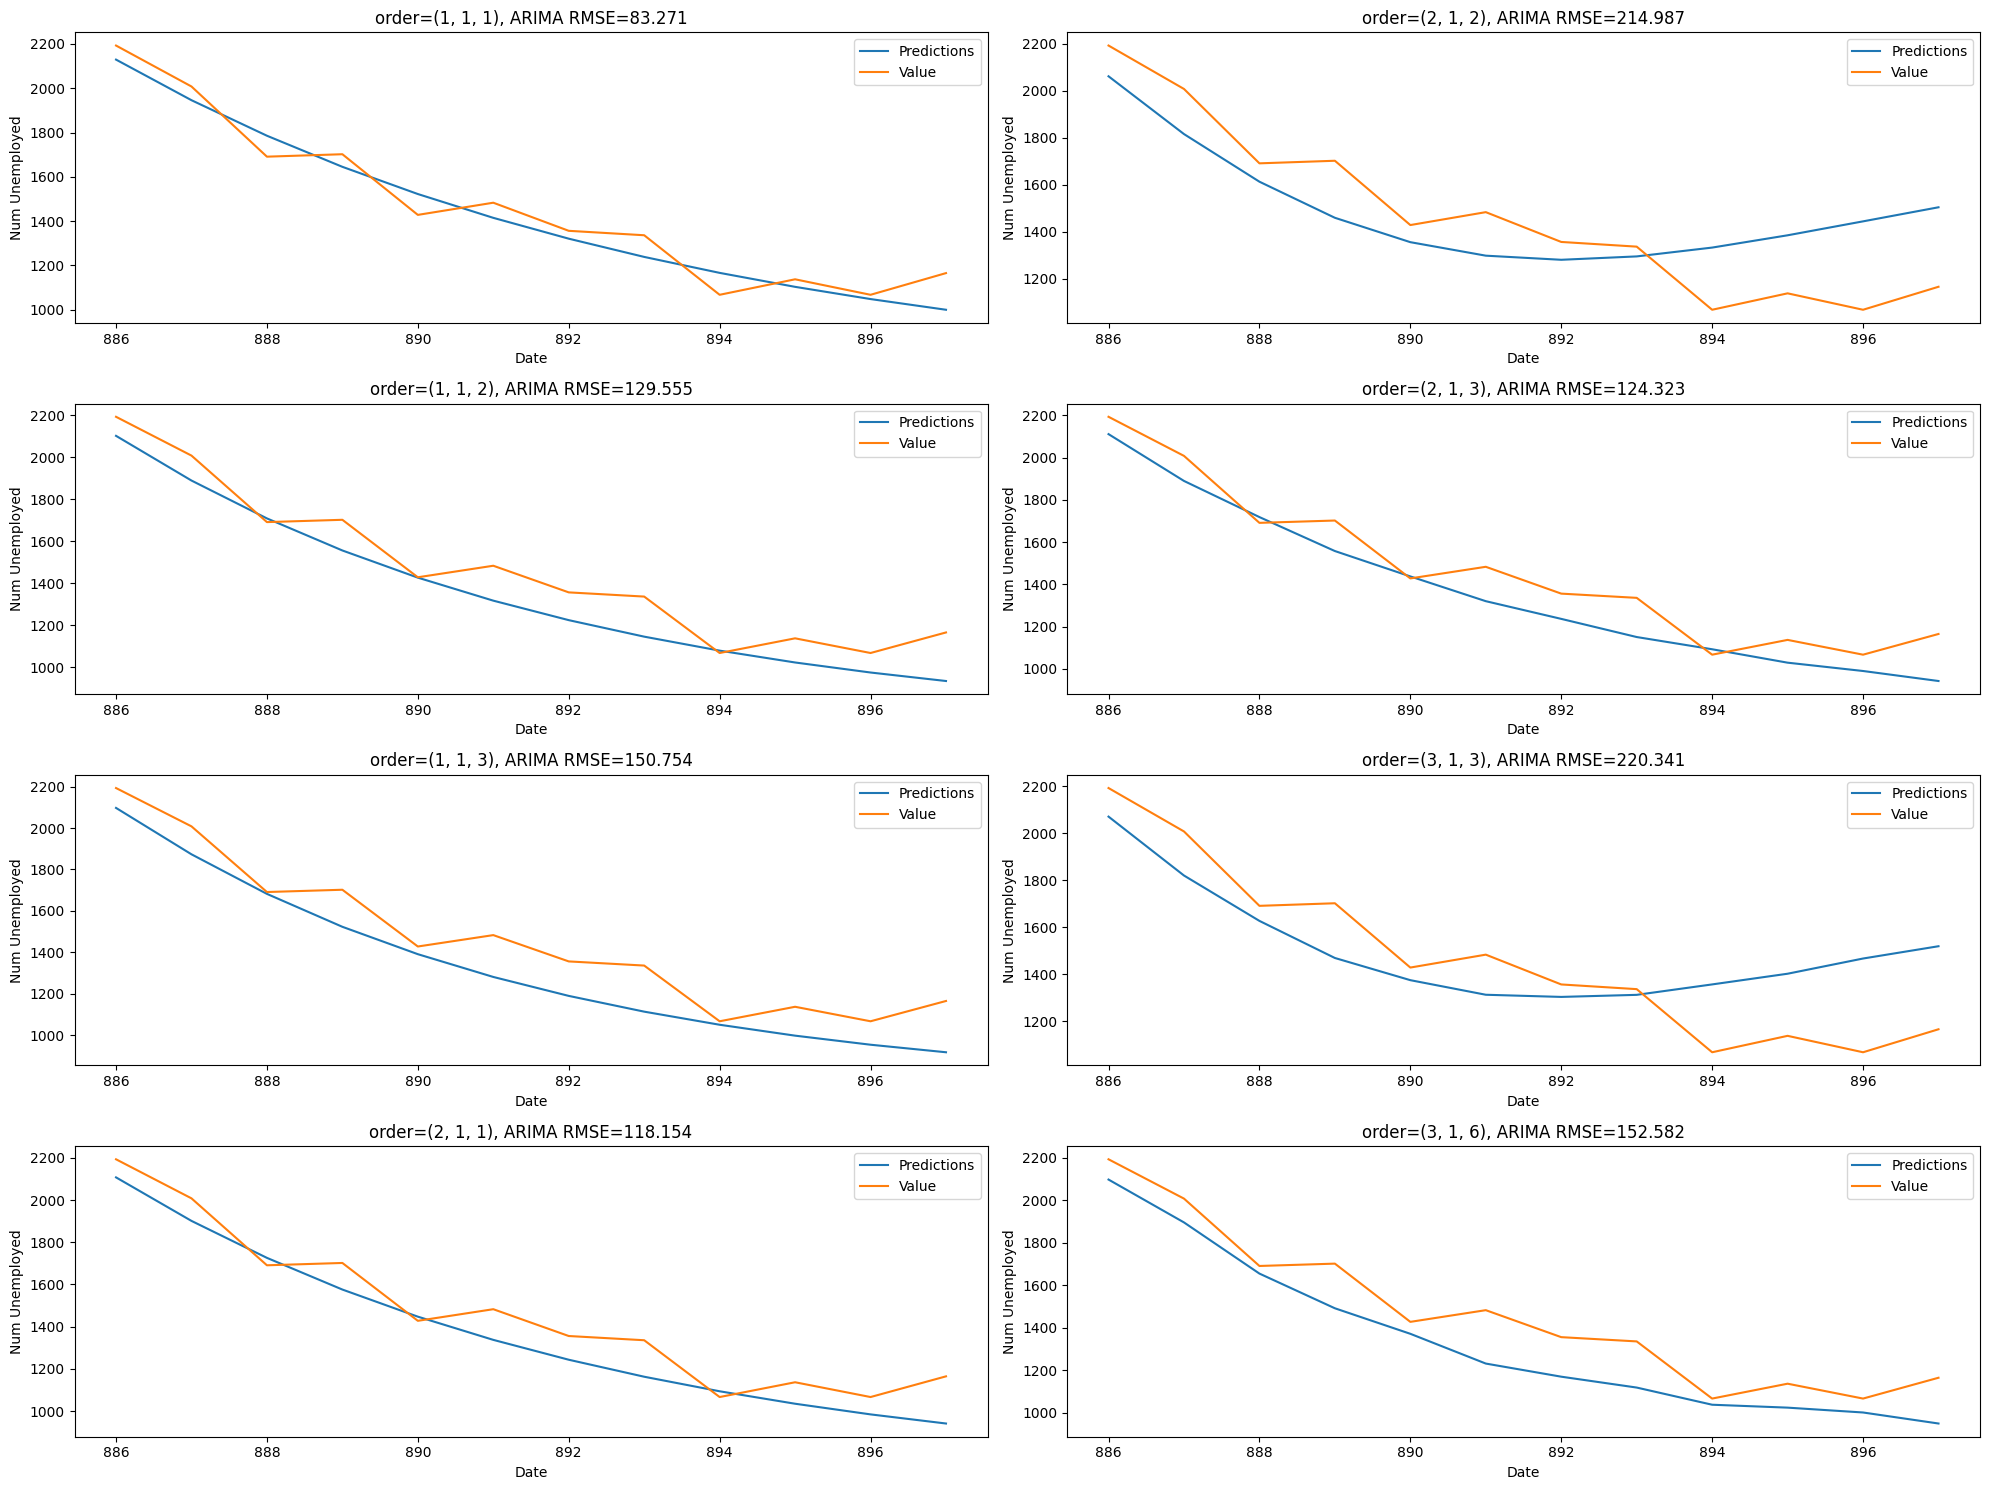

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(20, 15))

i = 0
j = 0
test_data = data[-12:]
exclude_combinations = {(1,1,6), (2,1,6),(3,1,1),(3,1,2)}
for p in {1,2,3}:
    for q in {1,2,3,6}:
      order = (p, 1, q)
      # Skip excluded combinations
      if order in exclude_combinations:
          continue
      model = ARIMA(train_data["Value"], order=order).fit()

      if i > 3:
          i = 0
          j += 1

      predictions_one_year = model.predict(start=len(train_data["Value"]), end=len(train_data["Value"]) + len(test_data) - 1)


      predictions_one_year.plot(ax=ax[i, j], label='Predictions')
      test_data.plot(ax=ax[i, j])
      ax[i, j].legend()
      ax[i, j].set_xlabel('Date')
      ax[i, j].set_ylabel('Num Unemployed')
      ax[i, j].set_title(f'order={order}, ARIMA RMSE={round(mean_squared_error(test_data["Value"], predictions_one_year, squared=False), 3)}')
      i += 1

fig.tight_layout()
plt.show()


# Running simplified model that statistically significant (p=1,d=1,q=1)

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  886
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5287.966
Date:                Sat, 27 Jan 2024   AIC                          10581.932
Time:                        22:23:44   BIC                          10596.289
Sample:                             0   HQIC                         10587.421
                                - 886                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8751      0.016     53.418      0.000       0.843       0.907
ma.L1         -0.6322      0.023    -27.180      0.000      -0.678      -0.587
sigma2      9062.7642    165.199     54.860      0.0

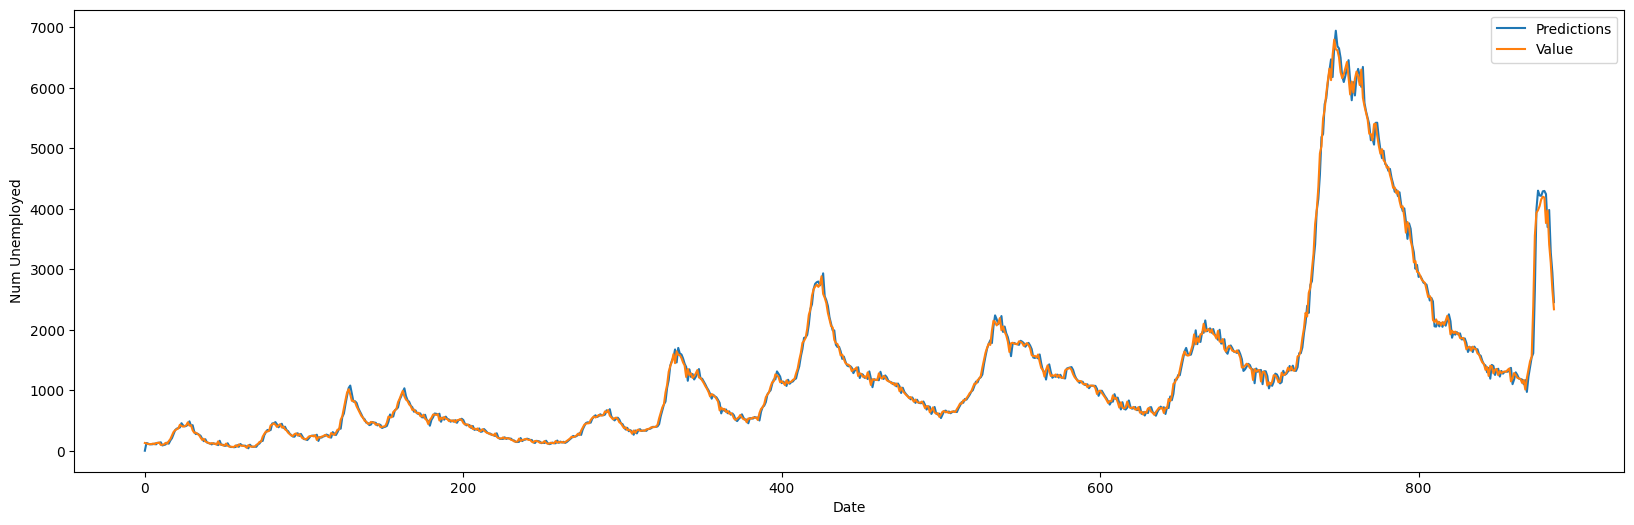

RMSE=95.242


In [ ]:
model111=ARIMA(train_data["Value"],order=(1,1,1))
model_fit111=model111.fit()
print(model_fit111.summary())

predictions_train = model_fit111.predict()

fig, ax = plt.subplots(figsize=(20, 6))
predictions_train.plot(ax=ax, label='Predictions')
train_data.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Num Unemployed')
plt.legend()
plt.show()

rmse = mean_squared_error(train_data["Value"], predictions_train, squared=False)
print('RMSE=%.3f' % (rmse))

#Predicting on test data (last 12 samples)

886    2129.451611
887    1946.066443
888    1785.577879
889    1645.127159
890    1522.212450
891    1414.644291
892    1320.506583
893    1238.122465
894    1166.024437
895    1102.928228
896    1047.709914
897     999.385897
Name: predicted_mean, dtype: float64


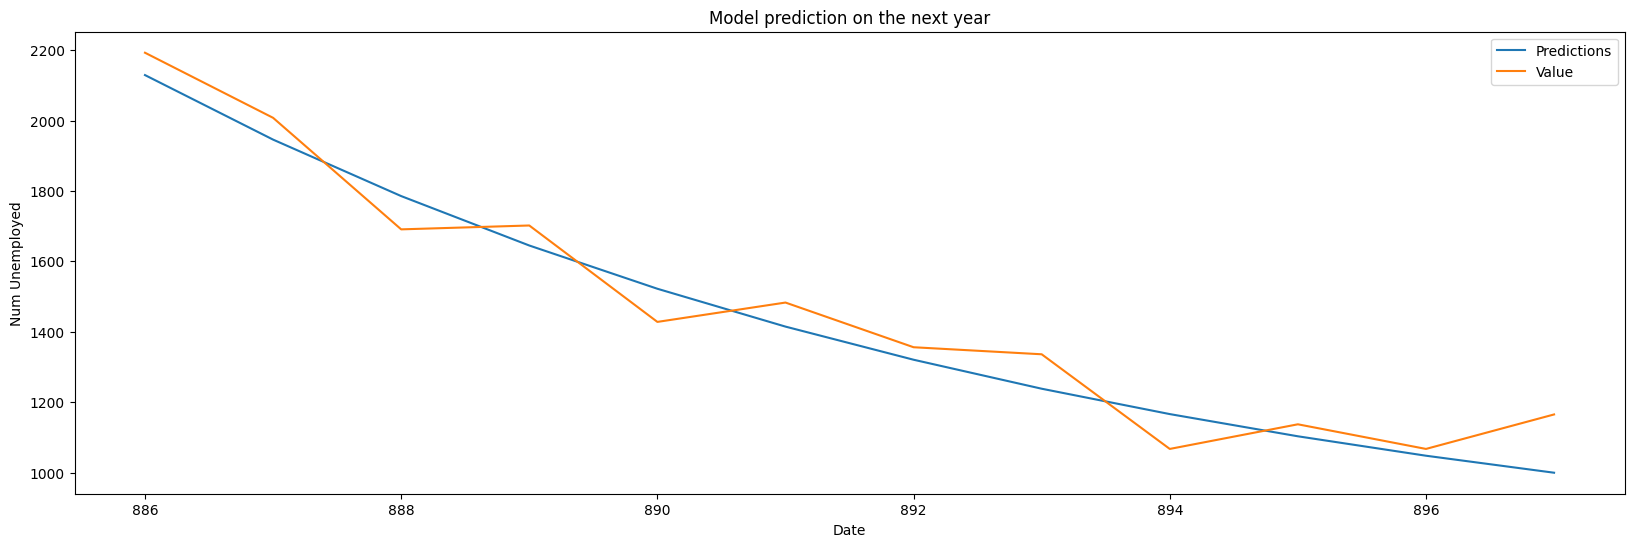

----------------------------------------------------
RMSE=83.271


In [ ]:
predictions_1y = model_fit111.predict(start=len(train_data["Value"]), end=len(train_data["Value"]) + len(test_data["Value"])-1)
print(predictions_1y)

fig, ax = plt.subplots(figsize=(20, 6))

predictions_1y.plot(ax=ax, label='Predictions')
test_data.plot(ax=ax)

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Num Unemployed')
ax.set_title(f'Model prediction on the next year')
plt.show()

print("----------------------------------------------------")
rmse = mean_squared_error(test_data["Value"], predictions_1y, squared=False)
print('RMSE=%.3f' % (rmse))

# Continuous Prediction on the next year

In [ ]:
con_predict= pd.Series()
for t in range(len(test_data)):
    model_testing = ARIMA(data["Value"][:-12+t],order=(1,1,1)).fit()
    predict_1next = model_testing.predict(len(train_data["Value"]) + t)
    con_predict = pd.concat([con_predict, pd.Series(predict_1next)])
con_predict

<ipython-input-52-f9f14a7c0862>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predict= pd.Series()


886    2129.451611
887    2026.165157
888    1857.564226
889    1516.698592
890    1596.044681
891    1293.063223
892    1411.599075
893    1279.846679
894    1282.981505
895     968.496460
896    1090.802588
897    1020.825390
dtype: float64

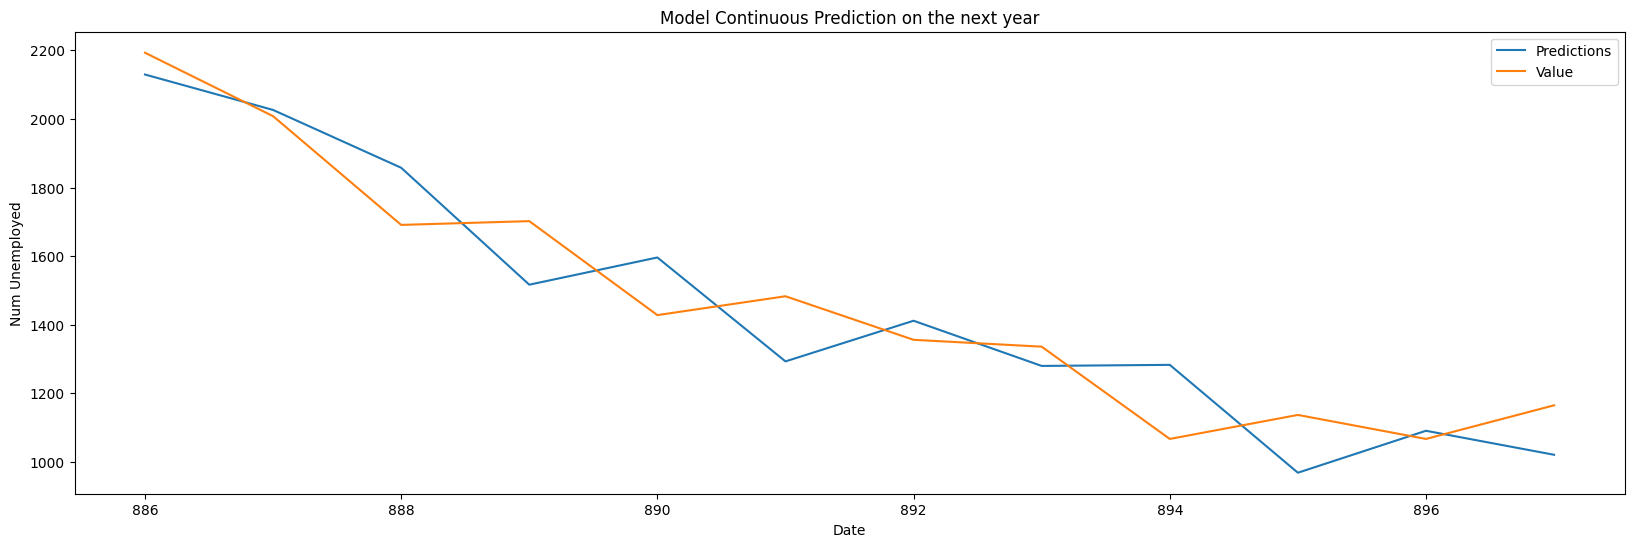

----------------------------------------------------
RMSE=139.464


In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
con_predict.plot(ax=ax, label='Predictions')
test_data.plot(ax=ax)

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Num Unemployed')
ax.set_title(f'Model Continuous Prediction on the next year')
plt.show()

print("----------------------------------------------------")
rmse = mean_squared_error(test_data["Value"], con_predict, squared=False)
print('RMSE=%.3f' % (rmse))

# Comparison over the different models and the real values

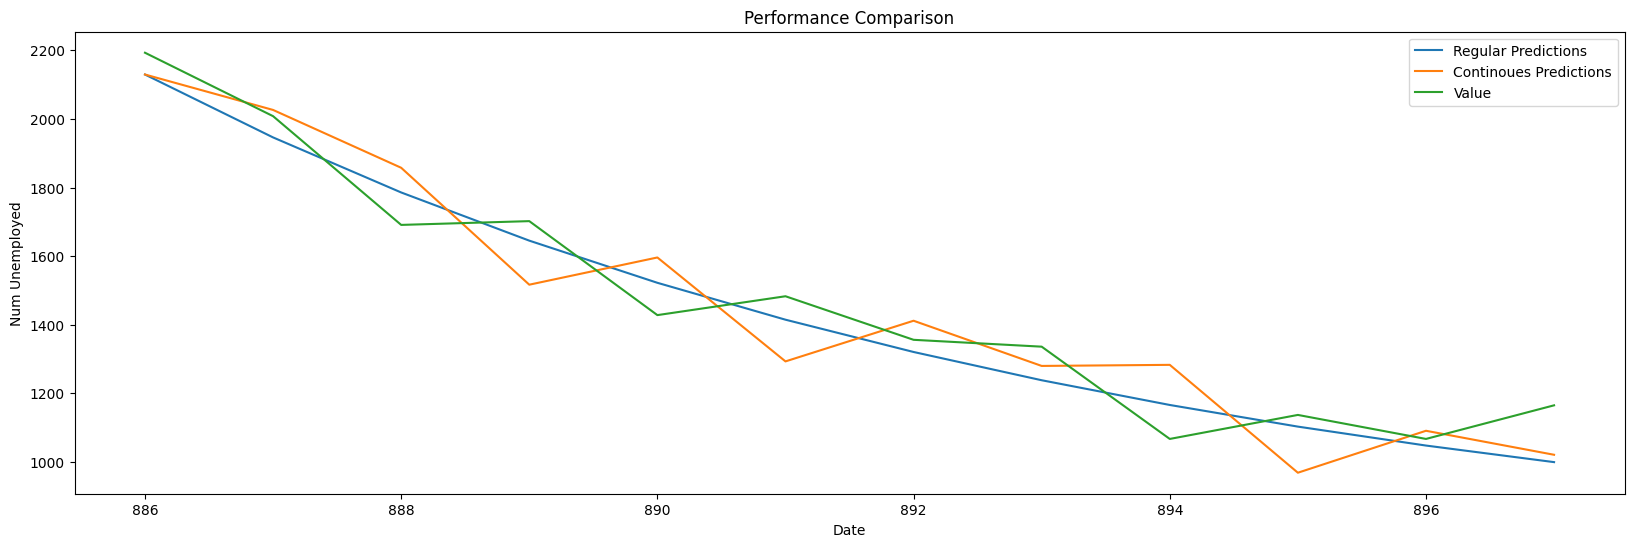

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
predictions_1y.plot(ax=ax, label='Regular Predictions')
con_predict.plot(ax=ax, label='Continoues Predictions')
test_data.plot(ax=ax)

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Num Unemployed')
ax.set_title(f'Performance Comparison')
plt.show()

##Finding RMSE values for predictions

In [ ]:
rmse_reg_predict = mean_squared_error(test_data["Value"], predictions_1y, squared=False)
rmse_con_predict = mean_squared_error(test_data["Value"], con_predict, squared=False)
print('RMSE Regular Predictions=%.3f' % (rmse_reg_predict))
print('RMSE Continoues Predictions=%.3f' % (rmse_con_predict))

RMSE Regular Predictions=83.271
RMSE Continoues Predictions=139.464
